# Linear Regression
## Introduction
Bruhhhhh

## Explanation of the Algorithm in Python
### Import the libraries
Import the necessary libraries like numpy, pandas, and matplotlib.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset
We will load a dataset containing `Square_Footage` and `Price` columns, which we will use to predict the price of a house based on its square footage.

In [3]:
data = pd.read_csv(r"C:\Users\arsha\OneDrive - Manipal Academy of Higher Education\Desktop\Cryptonite\Sample_Datasets\linear_reg_dataset.csv")
data.head()

,Square_Footage,Bedrooms,Bathrooms,Distance_to_City_Center,Property_Age,Price
0,1810.890416,1,1,11.152274,50,237005.375209
1,3827.500072,4,1,19.707997,36,517833.541336
2,3061.978796,5,2,20.398798,21,528073.195946
3,2595.304695,4,3,26.060859,28,443818.751152
4,1046.065242,5,3,7.675373,13,317212.162612


### Defining Variables
We'll extract `Square_Footage` as our independent variable \( x \) and `Price` as our dependent variable \( y \).


In [4]:
x = data['Square_Footage']
y = data['Price']

# Convert to NumPy arrays for easier calculations
x = np.array(x)
y = np.array(y)
n = len(x)


### Calculating Slope and Intercept
![s05170811122024](https://a.okmd.dev/md/6732977e45f2f.png)


In [5]:
# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate slope (m) and intercept (b)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
m = numerator / denominator
b = y_mean - (m * x_mean)

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")


Slope (m): 104.57126631088809
Intercept (b): 145591.87204940149


### Making Predictions
![s05175911122024](https://a.okmd.dev/md/673297b0ac964.png)


In [6]:
y_pred = m * x + b


### Visualizing the Data and Regression Line
We will plot the data points and overlay the linear regression line.


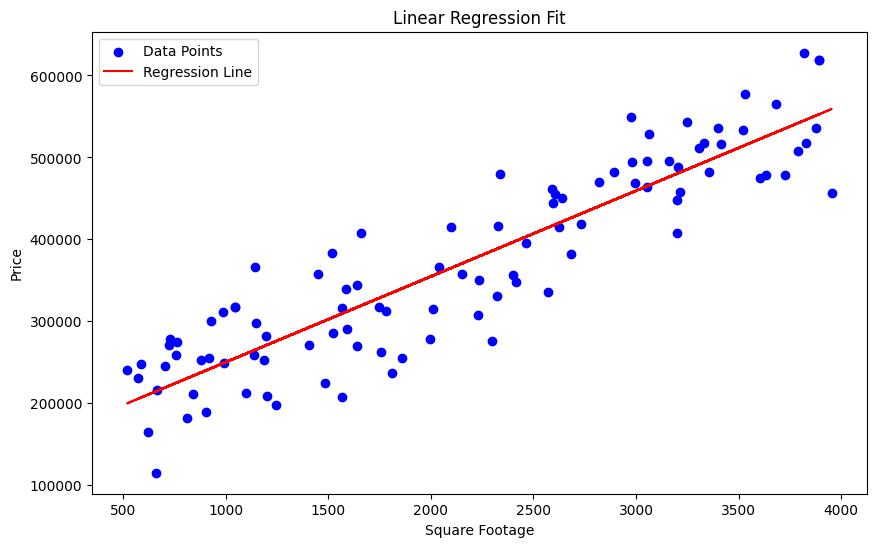

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()